In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("C:\\Users\\91875\\Jupyter Projects\\Gold Price Prediction\\goldstock.csv")
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [3]:
df.tail()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [5]:
df.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [6]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Display first few rows to check
print(df.head())

            Unnamed: 0   Close   Volume    Open    High     Low
Date                                                           
2014-01-22        2532  1238.6  80262.0  1240.5  1243.5  1235.5
2014-01-23        2531  1262.5  41697.0  1235.1  1267.1  1230.8
2014-01-24        2530  1264.5  34998.0  1264.3  1273.2  1256.9
2014-01-27        2529  1263.5  63419.0  1269.9  1280.1  1252.0
2014-01-28        2528  1250.5  81426.0  1254.9  1261.9  1248.0


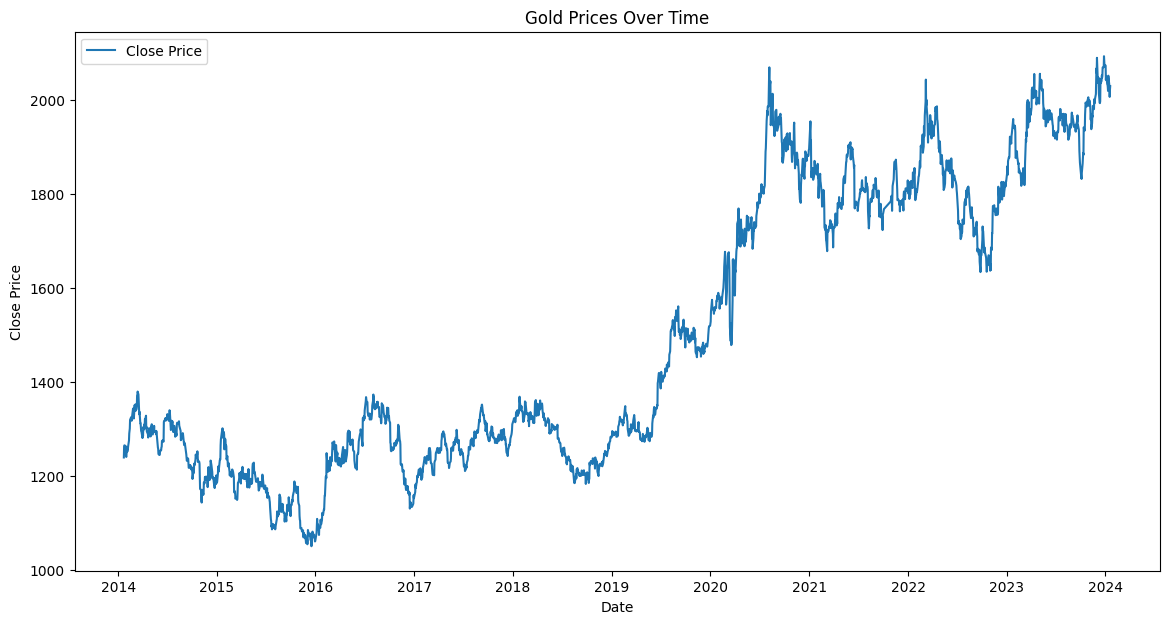

In [7]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

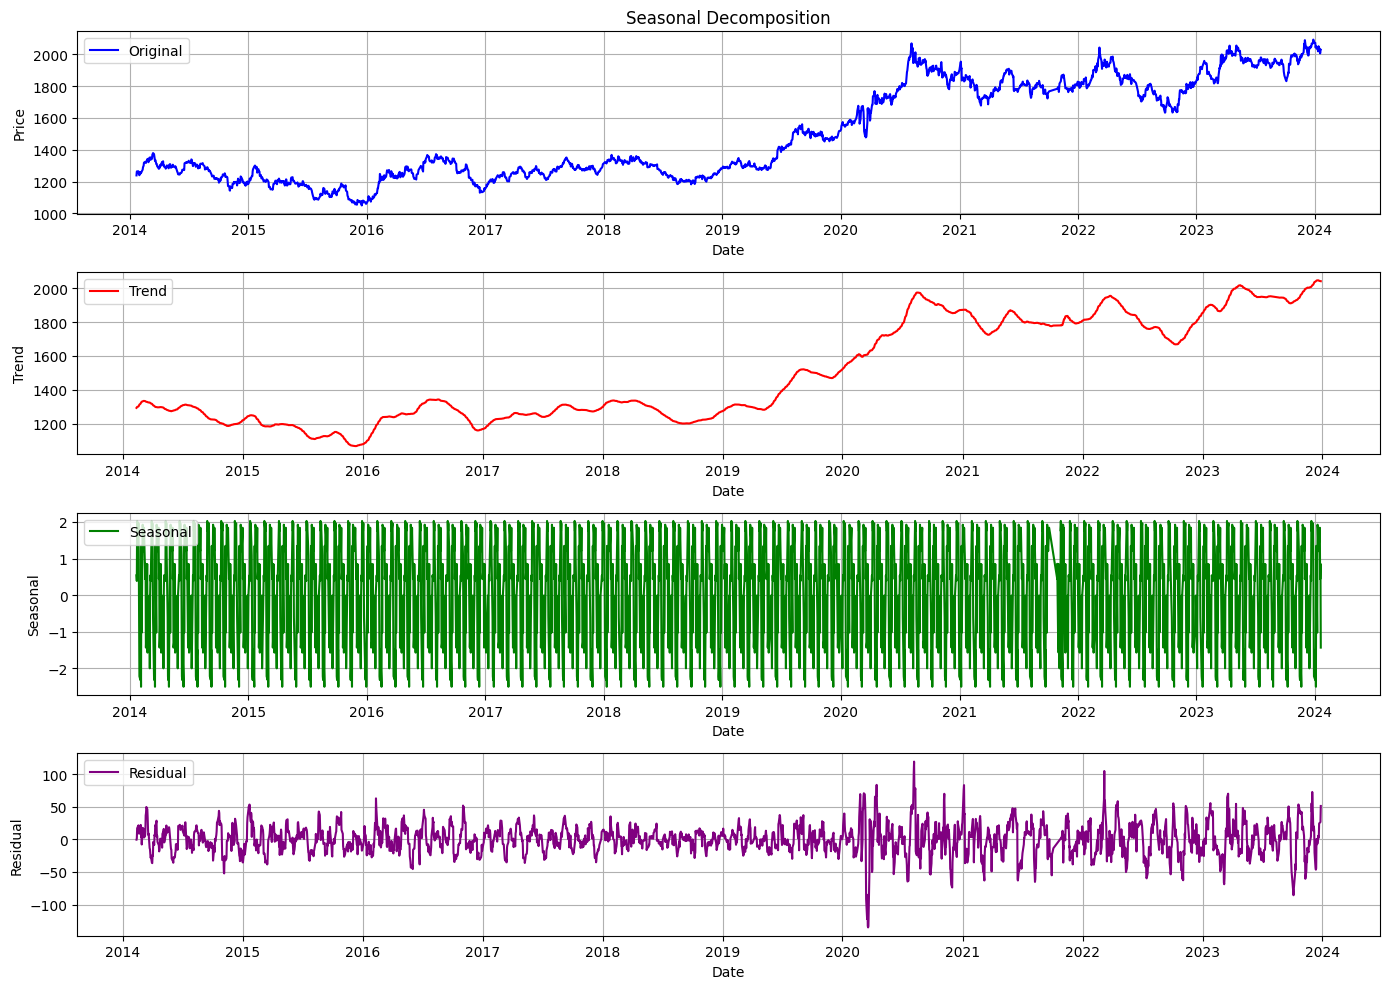

In [8]:
# Assuming df is your DataFrame with 'Date' as index and 'Close' as a column

# Perform seasonal decomposition
result = seasonal_decompose(df['Close'], model='additive', period=30)  # Adjust period based on your data's seasonality

# Plot decomposition
plt.figure(figsize=(14, 10))

# Original series
plt.subplot(411)
plt.plot(df.index, df['Close'], label='Original', color='b')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Trend component
plt.subplot(412)
plt.plot(df.index, result.trend, label='Trend', color='r')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)

# Seasonal component
plt.subplot(413)
plt.plot(df.index, result.seasonal, label='Seasonal', color='g')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.grid(True)

# Residual component
plt.subplot(414)
plt.plot(df.index, result.resid, label='Residual', color='purple')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()

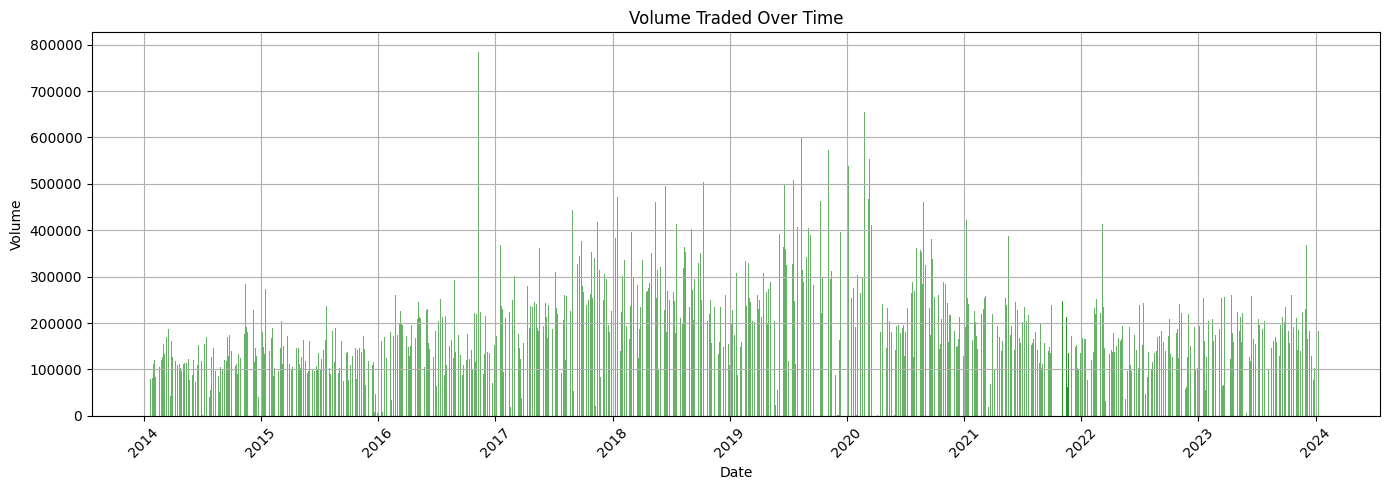

In [9]:
#simple volume bar plot
plt.figure(figsize=(14, 5))
plt.bar(df.index, df['Volume'], color='g', alpha=0.6)
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values if any
df = df.fillna(method='ffill')

# Feature engineering: Creating lag features
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

# Drop NaN values created by lagging
df = df.dropna()


Unnamed: 0    0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64


C:\Users\91875\AppData\Local\Temp\ipykernel_19764\2004362973.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [13]:
# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'Close_lag1', 'Close_lag2', 'Close_lag3']]
y = df['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')


Linear Regression MSE: 46.541698430987765, R2: 0.9959261729172402


In [15]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')


Random Forest MSE: 100.3048804123518, R2: 0.9912202443801501


In [16]:
# Exponential Smoothing
exp_smooth = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=12)
exp_smooth_fit = exp_smooth.fit()
y_pred_exp_smooth = exp_smooth_fit.forecast(steps=len(X_test))

# Evaluation
mse_exp_smooth = mean_squared_error(y_test, y_pred_exp_smooth)
r2_exp_smooth = r2_score(y_test, y_pred_exp_smooth)
print(f'Exponential Smoothing MSE: {mse_exp_smooth}, R2: {r2_exp_smooth}')


C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Exponential Smoothing MSE: 89174.14511248785, R2: -6.805474653656697


C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
# ARIMA Model
arima_model = ARIMA(df['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()
y_pred_arima = arima_result.forecast(steps=len(X_test))

# Evaluation
mse_arima = mean_squared_error(y_test, y_pred_arima)
r2_arima = r2_score(y_test, y_pred_arima)
print(f'ARIMA MSE: {mse_arima}, R2: {r2_arima}')


C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA MSE: 31757.219213315337, R2: -1.7797313820891283


C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:
# Print model performance
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')
print(f'Random Forest MSE: {mse_rf}, R2: {r2_rf}')
print(f'ARIMA MSE: {mse_arima}, R2: {r2_arima}')
print(f'Exponential Smoothing MSE: {mse_exp_smooth}, R2: {r2_exp_smooth}')


Linear Regression MSE: 46.541698430987765, R2: 0.9959261729172402
Random Forest MSE: 100.3048804123518, R2: 0.9912202443801501
ARIMA MSE: 31757.219213315337, R2: -1.7797313820891283
Exponential Smoothing MSE: 89174.14511248785, R2: -6.805474653656697


In [19]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA


C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


In [20]:
# Define the SMA Crossover Strategy
class SmaCross(Strategy):
    n1 = 10
    n2 = 20
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

# Define the Reverse SMA Crossover Strategy
class ReverseSmaCross(Strategy):
    n1 = 10
    n2 = 20
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.sell()
        elif crossover(self.sma2, self.sma1):
            self.buy()

# Ensure your dataframe is sorted by date in ascending order and the index is a datetime index
df = df.sort_index()
df.index = pd.to_datetime(df.index)

# Backtest the SMA Crossover Strategy
bt_sma = Backtest(df, SmaCross, cash=10000, commission=.002, exclusive_orders=True)
stats_sma = bt_sma.run()
bt_sma.plot()

# Backtest the Reverse SMA Crossover Strategy
bt_reverse_sma = Backtest(df, ReverseSmaCross, cash=10000, commission=.002, exclusive_orders=True)
stats_reverse_sma = bt_reverse_sma.run()
bt_reverse_sma.plot()

# Print performance
print("SMA Crossover Strategy Performance:")
print(stats_sma)

print("Reverse SMA Crossover Strategy Performance:")
print(stats_reverse_sma)



C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Users\91875\AppData\Roaming\Python\Pyth

C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
C:\Users\91875\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Users\91875\AppData\Roaming\Python\Pyth

SMA Crossover Strategy Performance:
Start                     2014-01-27 00:00:00
End                       2024-01-19 00:00:00
Duration                   3644 days 00:00:00
Exposure Time [%]                   98.325359
Equity Final [$]                     6275.493
Equity Peak [$]                    10672.8864
Return [%]                          -37.24507
Buy & Hold Return [%]               60.609418
Return (Ann.) [%]                   -4.606016
Volatility (Ann.) [%]               12.742455
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -41.881767
Avg. Drawdown [%]                   -7.856138
Max. Drawdown Duration     2871 days 00:00:00
Avg. Drawdown Duration      357 days 00:00:00
# Trades                                  137
Win Rate [%]                        35.766423
Best Trade [%]                      13.267151
Worst Trade [%]                    -10.78442

In [21]:
from scipy.stats import pearsonr


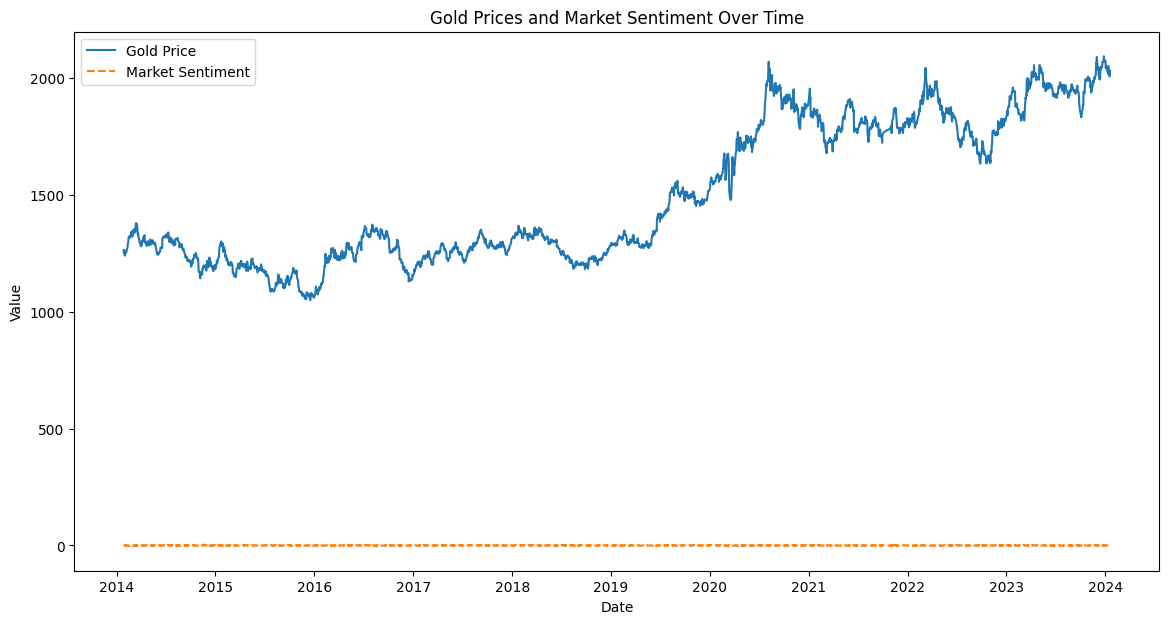

In [22]:
# Step 2: Simulate Market Sentiment (Example: Using Random Data)
np.random.seed(42)
dates = df.index
num_samples = len(dates)

# Simulate market sentiment as a random series
market_sentiment = np.random.normal(loc=0, scale=1, size=num_samples)

# Add market sentiment to the DataFrame
df['Market_Sentiment'] = market_sentiment

# Step 3: Visualize and Analyze
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Gold Price')
plt.plot(df.index, df['Market_Sentiment'], label='Market Sentiment', linestyle='--')
plt.title('Gold Prices and Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [23]:
# Step 4: Statistical Analysis - Pearson Correlation
corr, _ = pearsonr(df['Close'], df['Market_Sentiment'])
print(f"Pearson Correlation between Gold Price and Market Sentiment: {corr}")


Pearson Correlation between Gold Price and Market Sentiment: -0.0005815909089840505


In [24]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr

In [25]:
# Generate synthetic macroeconomic indicators
np.random.seed(42)
dates = df.index
num_samples = len(dates)

# Simulate macroeconomic indicators
inflation = np.random.normal(loc=2, scale=0.5, size=num_samples)
interest_rate = np.random.normal(loc=3, scale=1, size=num_samples)
gdp = np.random.normal(loc=3, scale=0.2, size=num_samples)

# Create a DataFrame for macroeconomic indicators
macro_data = pd.DataFrame({
    'Date': dates,
    'Inflation': inflation,
    'Interest_Rate': interest_rate,
    'GDP': gdp
})
macro_data.set_index('Date', inplace=True)

# Merge the datasets on the Date index
data = df.merge(macro_data, left_index=True, right_index=True)
data.dropna(inplace=True)

# Basic statistics
print(data.describe())

        Unnamed: 0        Close         Volume         Open         High  \
count  2544.000000  2544.000000    2544.000000  2544.000000  2544.000000   
mean   1249.342767  1503.661792  186003.086478  1503.693357  1513.436164   
std     727.936859   299.311747   97275.445565   299.613966   301.755293   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%     602.750000  1251.350000  127088.000000  1250.875000  1258.575000   
50%    1239.500000  1337.650000  175965.000000  1338.450000  1345.650000   
75%    1877.250000  1809.100000  234794.000000  1808.225000  1818.250000   
max    2529.000000  2093.100000  787217.000000  2094.400000  2098.200000   

               Low   Close_lag1   Close_lag2   Close_lag3  Market_Sentiment  \
count  2544.000000  2544.000000  2544.000000  2544.000000       2544.000000   
mean   1493.771541  1503.353813  1503.044458  1502.722131          0.036723   
std     296.892160   299.160911   299.012457   298.872379          0.983525   

In [30]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


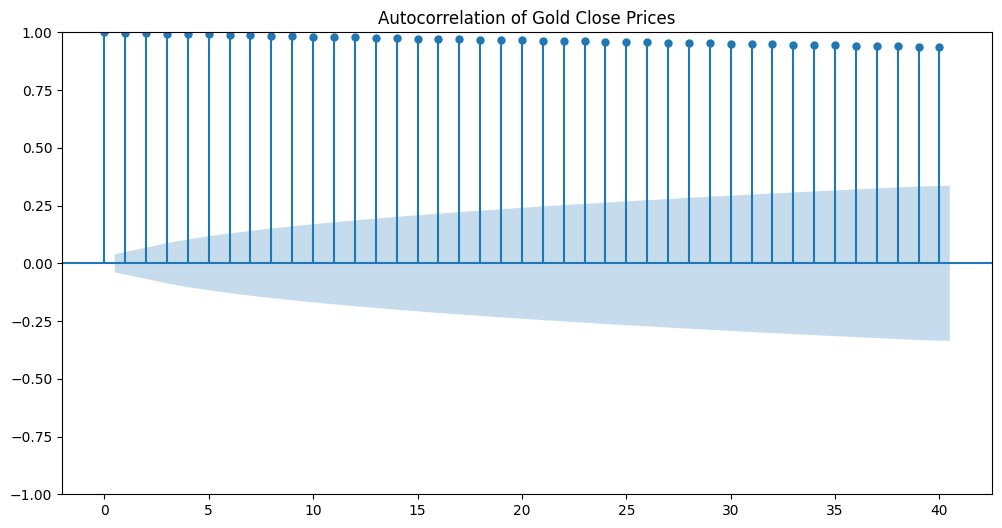

In [32]:
# Autocorrelation plot
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df['Close'], lags=40, ax=ax)
plt.title('Autocorrelation of Gold Close Prices')
plt.show()
